In [1]:
#libraries to be installed
print("libraries are : {numpy,pandas,os,shutil,matplotlib,librosa,soundfile,Ipython,tensorflow,sklearn,seaborn,tabulate}")


#pip install numpy pandas librosa SoundFile tensorflow scikit-learn keras seaborn tabulate

libraries are : {numpy,pandas,os,shutil,matplotlib,librosa,soundfile,Ipython,tensorflow,sklearn,seaborn,tabulate}


In [2]:
# import torch
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# torch.cuda.set_device(device)
# # Assuming that we are on a CUDA machine, this should print a CUDA device:
# print(device)

In [3]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
output = "./combined_files"
shutil.rmtree(output, ignore_errors=True)
os.makedirs(output, exist_ok=True)
print(f"Contents of {output} cleared.")

Contents of ./combined_files cleared.


In [4]:
import librosa
import soundfile as sf
dataset = "./dataset/16000_pcm_speeches/"
output = "./combined_files"
os.makedirs(output, exist_ok=True)
speakers = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]
num = 120
for speaker_folder in speakers:
    path = os.path.join(dataset, speaker_folder)
    print(path)
    wav_files = [f"{i}.wav" for i in range(num)]
    combined = []
    for wav_file in wav_files:
        wav_file_path = os.path.join(path, wav_file)
        audio, sr = librosa.load(wav_file_path)
        combined.extend(audio)
    out = os.path.join(output, f"{speaker_folder}_combined.wav")
    sf.write(out, combined, sr)
print("Combination complete", output)


./dataset/16000_pcm_speeches/Benjamin_Netanyau
./dataset/16000_pcm_speeches/Jens_Stoltenberg
./dataset/16000_pcm_speeches/Julia_Gillard
./dataset/16000_pcm_speeches/Magaret_Tarcher
./dataset/16000_pcm_speeches/Nelson_Mandela
Combination complete ./combined_files


In [5]:
from IPython.display import display, Audio
def listen(audio_path):
    display(Audio(filename=audio_path))
speaker_folder = "Nelson_Mandela_combined"
audio_path = os.path.join(output, f"{speaker_folder}.wav")
print(f"Click the play: {audio_path}")
listen(audio_path)

Click the play: ./combined_files\Nelson_Mandela_combined.wav


In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
dir = "./dataset/16000_pcm_speeches/"
speakers = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]
def ext(dir, speakers):
    features = []
    labels = []
    for i, speaker_folder in enumerate(speakers):
        path = os.path.join(dir, speaker_folder)
        for filename in os.listdir(path):
            if filename.endswith(".wav"):
                file_path = os.path.join(path, filename)
                audio, sr = librosa.load(file_path, sr=None, duration=1)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=25)
                mfccs = StandardScaler().fit_transform(mfccs)
                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)
X, y = ext(dir, speakers)
for f in X[:1]:
    print(f)


print(len(y))
print("ayyara")

[[-4.89897919e+00  2.04339474e-01  2.04336211e-01  2.04330832e-01
   2.04323292e-01  2.04313561e-01  2.04301685e-01  2.04287708e-01
   2.04271525e-01  2.04253346e-01  2.04232991e-01  2.04210564e-01
   2.04186067e-01  2.04159498e-01  2.04130873e-01  2.04100266e-01
   2.04067469e-01  2.04033017e-01  2.03996450e-01  2.03957960e-01
   2.03917578e-01  2.03875288e-01  2.03831151e-01  2.03785211e-01
   2.03737438e-01]
 [-4.89897919e+00  2.04240859e-01  2.04239130e-01  2.04236239e-01
   2.04232201e-01  2.04227015e-01  2.04220667e-01  2.04213172e-01
   2.04204544e-01  2.04194739e-01  2.04183802e-01  2.04171717e-01
   2.04158470e-01  2.04144120e-01  2.04128608e-01  2.04111949e-01
   2.04094246e-01  2.04075262e-01  2.04055220e-01  2.04034045e-01
   2.04011738e-01  2.03988329e-01  2.03963801e-01  2.03938171e-01
   2.03911424e-01]
 [-4.89897919e+00  2.04225004e-01  2.04223499e-01  2.04221010e-01
   2.04217508e-01  2.04213038e-01  2.04207554e-01  2.04201072e-01
   2.04193562e-01  2.04185158e-01  2.0

In [7]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y = l.fit_transform(y)
l.classes_ = np.array(speakers)
X_train, X_temp, y_train, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_te, test_size=0.5, random_state=42)
print("Training:", X_train.shape[0])
print("Training:", X_test.shape)
print("Validation:", X_val.shape)
y_tr=y_train
X_tr=X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_te=X_temp.reshape((X_temp.shape[0],X_temp.shape[1]*X_temp.shape[2]))
print("Training:", X_train.shape)
print("Testing:", X_te.shape)
print("Testing:", y_te.shape)

Training: 5250
Training: (1126, 32, 25)
Validation: (1125, 32, 25)
Training: (5250, 32, 25)
Testing: (2251, 800)
Testing: (2251,)


# Logistic regression


In [8]:
print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver='saga', max_iter=1000,
                                           multi_class='multinomial')

print('LogisticRegression score: %f'
      % logistic.fit(X_tr, y_tr).score(X_te, y_te))
log_acc=logistic.score(X_te, y_te)
print(log_acc)

(5250, 800) (5250,) (2251, 800) (2251,)
LogisticRegression score: 0.977788
0.977787649933363


f1_score :  0.9780397412178281
[[467   9   0   2   0]
 [ 15 429   2   2   0]
 [  6   1 419   0   0]
 [  6   4   0 419   0]
 [  0   1   2   0 467]]


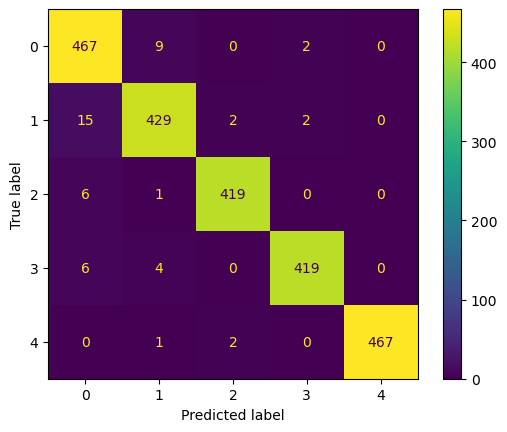

In [9]:
from sklearn.metrics import confusion_matrix,f1_score
y_pred = logistic.predict(X_te)
y_true = y_te
print('f1_score : ',f1_score(y_true,y_pred ,average='macro'))
log_f1=f1_score(y_true,y_pred ,average='macro')
cm = confusion_matrix(y_true, y_pred)
print(cm)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

# KNN CLASSIFIER

In [10]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, y_tr)
train_score = neigh.score(X_tr, y_tr)
test_score = neigh.score(X_te, y_te)
print('Knn with K =3 train score:{}'.format(train_score))
print('Knn with K =3 test score:{}'.format(test_score))

knn_acc=test_score

Knn with K =3 train score:0.9481904761904761
Knn with K =3 test score:0.9013771657041315


f1_score :  0.8999109283766396
[[452   4   1  21   0]
 [105 303   1  39   0]
 [ 11   1 390  19   5]
 [ 13   0   0 416   0]
 [  0   1   1   0 468]]


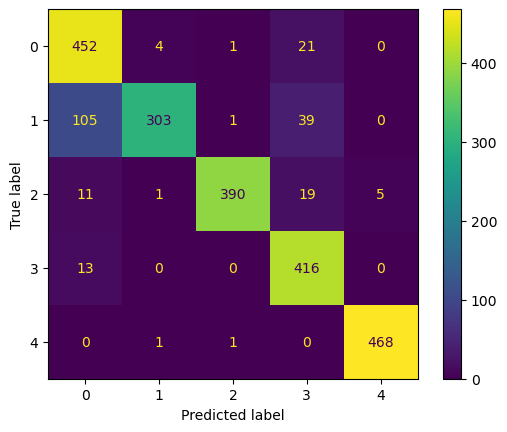

In [11]:
from sklearn.metrics import confusion_matrix,f1_score
y_pred = neigh.predict(X_te)
y_true = y_te
print('f1_score : ',f1_score(y_true,y_pred ,average='macro'))
knn_f1=f1_score(y_true,y_pred ,average='macro')
cm = confusion_matrix(y_true, y_pred)
print(cm)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

# MLP CLASSIFIER

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(25,25), max_iter=1000, alpha=1e-3,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

mlp.fit(X_tr, y_tr)

Iteration 1, loss = 1.42834003
Iteration 2, loss = 0.92165238
Iteration 3, loss = 0.66682582
Iteration 4, loss = 0.53712180
Iteration 5, loss = 0.46384924
Iteration 6, loss = 0.41338240
Iteration 7, loss = 0.37648943
Iteration 8, loss = 0.34630942
Iteration 9, loss = 0.31948273
Iteration 10, loss = 0.29681984
Iteration 11, loss = 0.27641993
Iteration 12, loss = 0.25718191
Iteration 13, loss = 0.24016388
Iteration 14, loss = 0.22556638
Iteration 15, loss = 0.21151732
Iteration 16, loss = 0.19859116
Iteration 17, loss = 0.18706364
Iteration 18, loss = 0.17580375
Iteration 19, loss = 0.16693580
Iteration 20, loss = 0.15802729
Iteration 21, loss = 0.15014022
Iteration 22, loss = 0.14446973
Iteration 23, loss = 0.13707857
Iteration 24, loss = 0.13024810
Iteration 25, loss = 0.12512134
Iteration 26, loss = 0.11978197
Iteration 27, loss = 0.11589845
Iteration 28, loss = 0.11125377
Iteration 29, loss = 0.10770137
Iteration 30, loss = 0.10349555
Iteration 31, loss = 0.09982026
Iteration 32, los

Iteration 264, loss = 0.00893608
Iteration 265, loss = 0.00873968
Iteration 266, loss = 0.00851884
Iteration 267, loss = 0.00852843
Iteration 268, loss = 0.00852779
Iteration 269, loss = 0.00865335
Iteration 270, loss = 0.00847690
Iteration 271, loss = 0.00826662
Iteration 272, loss = 0.00839939
Iteration 273, loss = 0.00826631
Iteration 274, loss = 0.00824823
Iteration 275, loss = 0.00833229
Iteration 276, loss = 0.00832278
Iteration 277, loss = 0.00823635
Iteration 278, loss = 0.00805827
Iteration 279, loss = 0.00820320
Iteration 280, loss = 0.00798528
Iteration 281, loss = 0.00819257
Iteration 282, loss = 0.00803624
Iteration 283, loss = 0.00804009
Iteration 284, loss = 0.00795917
Iteration 285, loss = 0.00783551
Iteration 286, loss = 0.00779981
Iteration 287, loss = 0.00774130
Iteration 288, loss = 0.00775764
Iteration 289, loss = 0.00771267
Iteration 290, loss = 0.00763207
Iteration 291, loss = 0.00779073
Iteration 292, loss = 0.00758518
Iteration 293, loss = 0.00756874
Iteration 

MLPClassifier(alpha=0.001, hidden_layer_sizes=(25, 25), max_iter=1000,
              random_state=1, solver='sgd', verbose=10)

In [13]:
print("Training set score: {}", mlp.score(X_tr, y_tr))
print("Test set score: {}", mlp.score(X_te, y_te))
mlp_acc= mlp.score(X_te, y_te)
from sklearn.metrics import confusion_matrix,f1_score
y_pred = mlp.predict(X_te)
y_true = y_te
print('f1_score : ',f1_score(y_true,y_pred ,average='macro'))
mlp_f1=f1_score(y_true,y_pred ,average='macro')

Training set score: {} 0.9996190476190476
Test set score: {} 0.9848956019546868
f1_score :  0.9850538775542697


#  LSTM-Softmax Speaker Recognition Model

Epoch 1/20
165/165 [==============================] - 4s 14ms/step - loss: 0.3886 - accuracy: 0.8522 - val_loss: 0.0913 - val_accuracy: 0.9822
Epoch 2/20
165/165 [==============================] - 2s 12ms/step - loss: 0.0955 - accuracy: 0.9693 - val_loss: 0.0804 - val_accuracy: 0.9760
Epoch 3/20
165/165 [==============================] - 2s 12ms/step - loss: 0.0557 - accuracy: 0.9804 - val_loss: 0.0470 - val_accuracy: 0.9831
Epoch 4/20
165/165 [==============================] - 2s 12ms/step - loss: 0.0528 - accuracy: 0.9823 - val_loss: 0.0466 - val_accuracy: 0.9876
Epoch 5/20
165/165 [==============================] - 2s 12ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.0414 - val_accuracy: 0.9849
Epoch 6/20
165/165 [==============================] - 2s 12ms/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0428 - val_accuracy: 0.9858
Epoch 7/20
165/165 [==============================] - 2s 12ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.0385 - val_accuracy: 0.9884

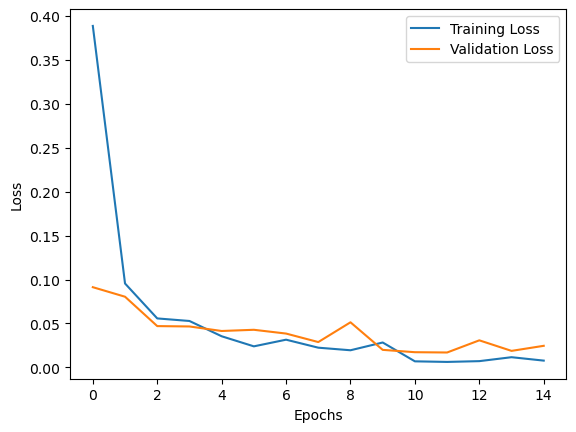

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(speakers), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ea = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
mo = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[ea])
if ea.stopped_epoch > 0:
    print("Early stopping triggered at epoch", ea.stopped_epoch + 1)
else:
    print("Training completed without early stopping")
plt.plot(mo.history['loss'], label='Training Loss')
plt.plot(mo.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


36/36 [==============================] - 0s 6ms/step
Accuracy: 0.9982238010657194
Weighted F1 Score: 0.9982223225535773


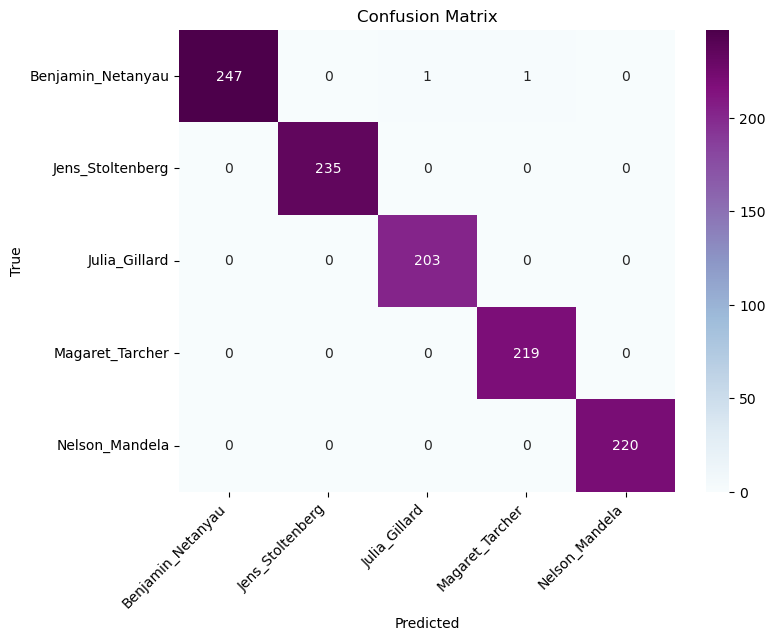

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_test_decoded = l.inverse_transform(y_test)
y_pred_decoded = l.inverse_transform(y_pred)
conf = confusion_matrix(y_test_decoded, y_pred_decoded, labels=speakers)
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test_decoded, y_pred_decoded, labels=speakers, average='weighted')
print(f"Weighted F1 Score: {f1}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="BuPu", xticklabels=speakers, yticklabels=speakers)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
from tabulate import tabulate

table_data = [
    ["Model", "Accuracy", "F1-Score"],
    ["Logistic regression",log_acc,log_f1],
    ["KNN CLASSIFIER",knn_acc,knn_f1],
    ["MLP CLASSIFIER", mlp_acc,mlp_f1],
    ["LSTM-Softmax Speaker Recognition Model", accuracy,f1],
    
]

print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+----------------------------------------+------------+------------+
| Model                                  |   Accuracy |   F1-Score |
+========================================+============+============+
| Logistic regression                    |   0.977788 |   0.97804  |
+----------------------------------------+------------+------------+
| KNN CLASSIFIER                         |   0.901377 |   0.899911 |
+----------------------------------------+------------+------------+
| MLP CLASSIFIER                         |   0.984896 |   0.985054 |
+----------------------------------------+------------+------------+
| LSTM-Softmax Speaker Recognition Model |   0.998224 |   0.998222 |
+----------------------------------------+------------+------------+
